In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import lmfit

from scipy.optimize import curve_fit
plt.rcParams['figure.figsize'] = 10, 5

In [372]:
wsat_uni = 164.4
wsat_multi = 278

def myfunc(p,a,n,m):
    return 164.4 *(1+(a*p)**n)**(-m)



def multimodal(pars, x, data=None, eps=None):
    parvals = pars.valuesdict()
    l1,l2 = parvals["l1"], parvals["l2"]
    a1,a2 = parvals["a1"], parvals["a2"]
    m1,m2 = parvals["m1"], parvals["m2"]
    n1,n2 = parvals["n1"], parvals["n2"]
    f1 =  wsat_multi * l1 * (1+(a1*x)**n1)**(-m1)
    f2 =  wsat_multi * l2 * (1+(a2*x)**n2)**(-m2)
    #f3 =  wsat_multi * l3 * (1+(a3*x)**n3)**(-m3)
    model = f1 + f2 #+ f3
    if data is None:
        return model
    if eps is None:
        return (model - data)**2
    return (model-data)**2 / eps

In [158]:
data_uni = pd.read_csv("raw_unimodal.csv")
data_multimodal = pd.read_csv("raw_multimodal.csv")



In [6]:
subset = data_uni[["log pc","w","sigma","regime"]]
grouped = subset.groupby("regime")

Hygroscopic
Mercury Intrusion
pm


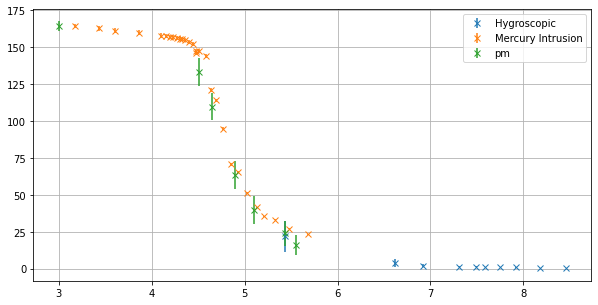

In [7]:
for group in grouped:
    print(group[0])
    plt.errorbar(group[1]["log pc"], group[1]["w"], yerr=group[1]["sigma"],fmt="x", label=group[0])
plt.legend()
plt.grid()

In [8]:
popt, pcov = curve_fit(myfunc, subset["log pc"], subset["w"],sigma=subset["sigma"], bounds=(0, np.inf), p0 = [1, 1, 1])


In [ ]:
662936
4     92.663028
        ...    
78    92.663051
79    92.663011
80    92.662971

Hygroscopic
Mercury Intrusion
pm


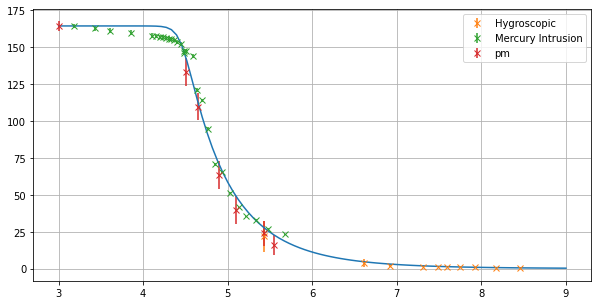

In [9]:
x= np.linspace(3,9,100)
plt.plot(x, myfunc(x, *popt))
for group in grouped:
    print(group[0])
    plt.errorbar(group[1]["log pc"], group[1]["w"], yerr=group[1]["sigma"],fmt="x", label=group[0])
plt.legend()
plt.grid()

In [15]:
subset_multi = data_multimodal[["log pc","w","sigma","regime"]]
grouped_multi = subset_multi.groupby("regime")

Hygroscopic
Mercury intrusion
PM


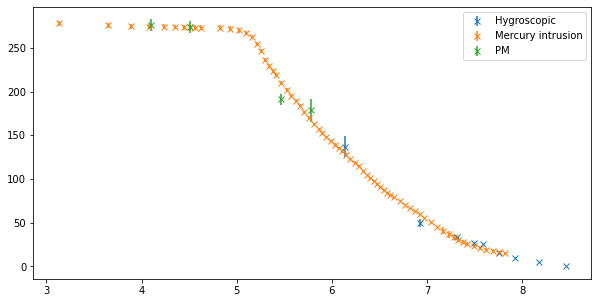

In [18]:
for group in grouped_multi:
    print(group[0])
    plt.errorbar(group[1]["log pc"], group[1]["w"], yerr=group[1]["sigma"],fmt="x", label=group[0])
plt.legend()

In [379]:
size = np.array([10.0,120.0,500.0]) * 0.00000001


#(name, value, vary, min, max, expr, brute_step).

p = lmfit.Parameters()
p.add_many(('a1', size[0],True, size[0]/5,  size[0]*5, None, None),
           ('a2', size[1],True, size[1]/5, size[1]*5, None, None), 
           #('a3', size[2],True, size[2]/5, size[2]*5, None, None), 
           ('l1', 0.5, True, 0.4,0.6, None, None),
           ('l2', 0.5, True, 0.4,0.6, None, None),
           #('l3', 1/3, True, 0,None, None, None), 
           ('l_sum', 1, True, 0, None, "(l1 + l2)", None),
           ('l_my', 0, True, 0, 0.0000001, "1-l_sum", None),
           ('n1', 1.1,True, 1, None, None, None), 
           ('n2', 31., True, 1, None, None, None), 
           #('n3', 1.1, True, 1, None, None, None), 
           ('m1', 0.5, False, None, None, "1-1/n1", None),
           ('m2', 0.5, False, None, None, "1-1/n2", None))
           #('m3', 0.5, False, None, None, "1-1/n3", None))




minner = lmfit.Minimizer(multimodal, p, fcn_args=(subset_multi["log pc"], subset_multi["w"], subset_multi["sigma"]))

In [380]:
res=minner.minimize()

In [381]:
res

In [270]:
out = multimodal(p, subset_multi["log pc"], subset_multi["w"], subset_multi["sigma"])

In [117]:
(subset_multi["log pc"], subset_multi["w"])

(0     8.458122
 1     8.176531
 2     7.921444
 3     7.750319
 4     7.590645
         ...   
 78    7.550000
 79    7.620000
 80    7.690000
 81    7.750000
 82    7.820000
 Name: log pc, Length: 83, dtype: float64,
 0      0.030026
 1      5.058227
 2      9.899668
 3     14.927751
 4     24.985760
         ...    
 78    21.010000
 79    19.030000
 80    17.540000
 81    16.220000
 82    14.730000
 Name: w, Length: 83, dtype: float64)

In [230]:
print(p)

Parameters([('a1', <Parameter 'a1', value=1e-06, bounds=[0:inf]>), ('a2', <Parameter 'a2', value=1.2e-05, bounds=[0:inf]>), ('a3', <Parameter 'a3', value=4.9999999999999996e-05, bounds=[0:inf]>), ('l1', <Parameter 'l1', value=0.3333333333333333, bounds=[0:1]>), ('l2', <Parameter 'l2', value=0.3333333333333333, bounds=[0:1]>), ('l3', <Parameter 'l3', value=0.3333333333333333, bounds=[0:1]>), ('l_sum', <Parameter 'l_sum', value=1.0, bounds=[0:inf], expr='(l1 + l2 + l3)'>), ('l_my', <Parameter 'l_my', value=0.0, bounds=[0:inf], expr='1-l_sum'>), ('n1', <Parameter 'n1', value=1.0, bounds=[0:inf]>), ('n2', <Parameter 'n2', value=1.0, bounds=[0:inf]>), ('n3', <Parameter 'n3', value=1.0, bounds=[0:inf]>), ('m1', <Parameter 'm1', value=0.5, bounds=[0:inf]>), ('m2', <Parameter 'm2', value=0.5, bounds=[0:inf]>), ('m3', <Parameter 'm3', value=0.5, bounds=[0:inf]>)])
